# **Bank Marketing Dataset Analysts**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the library and sckit-learn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

# Reading and Visualizing for the Dataset

In [ ]:
bank_dataset = pd.read_csv("/content/drive/MyDrive/Data Mining Project - 64CS2/bank-additional-full.csv", sep = ';')
bank_dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank = bank_dataset[(bank_dataset['age'] >= 40) & (bank_dataset['age'] <= 60)]
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41177,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


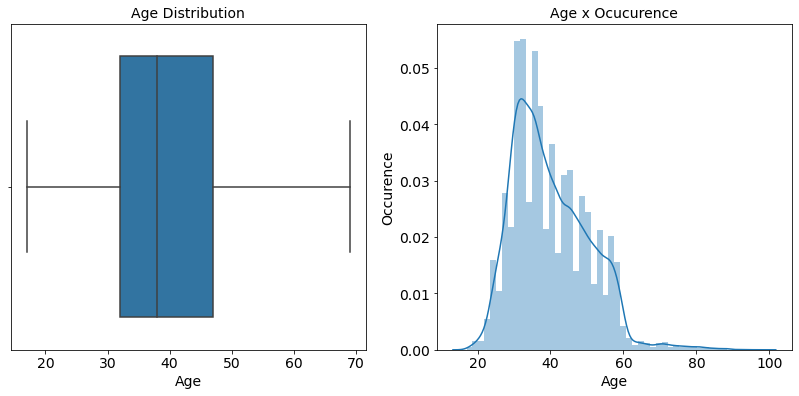

In [ ]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sns.boxplot(x = bank_dataset["age"], ax = ax1, showfliers = False)
ax1.set_xlabel("Age", fontsize = 14)
ax1.set_title("Age Distribution", fontsize = 14)
ax1.tick_params(labelsize = 14)

sns.distplot(x = bank_dataset["age"], ax = ax2)
ax2.set_xlabel('Age', fontsize = 14)
ax2.set_ylabel('Occurence', fontsize = 14)
ax2.set_title('Age x Ocucurence', fontsize = 14)
ax2.tick_params(labelsize = 14)
plt.show()

Text(0.5, 1.0, 'Job for each customers')

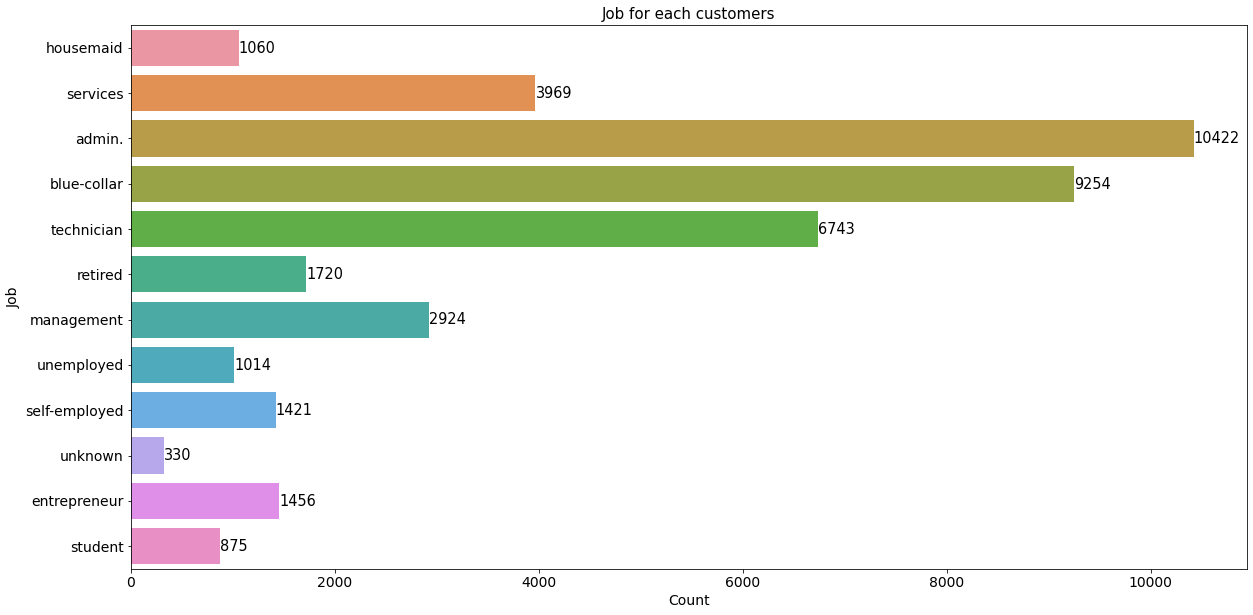

In [ ]:
# Job
plt.figure(figsize = (20, 10))
job_sns = sns.countplot(y = bank_dataset.job)
job_sns.set_xticklabels(job_sns.get_xticklabels())

for counts in job_sns.patches:
  width = counts.get_width()
  label_x = counts.get_x() + counts.get_width() + 0.05
  label_y = counts.get_y() + counts.get_height() / 1.4
  plt.text(label_x, label_y, s = f"{width:.0f}", ha='left', va='bottom', color = "black", size = 14.5)

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Job", fontsize = 14)
plt.title("Job for each customers", fontsize = 15)

Text(0.5, 1.0, 'Marital for each customers')

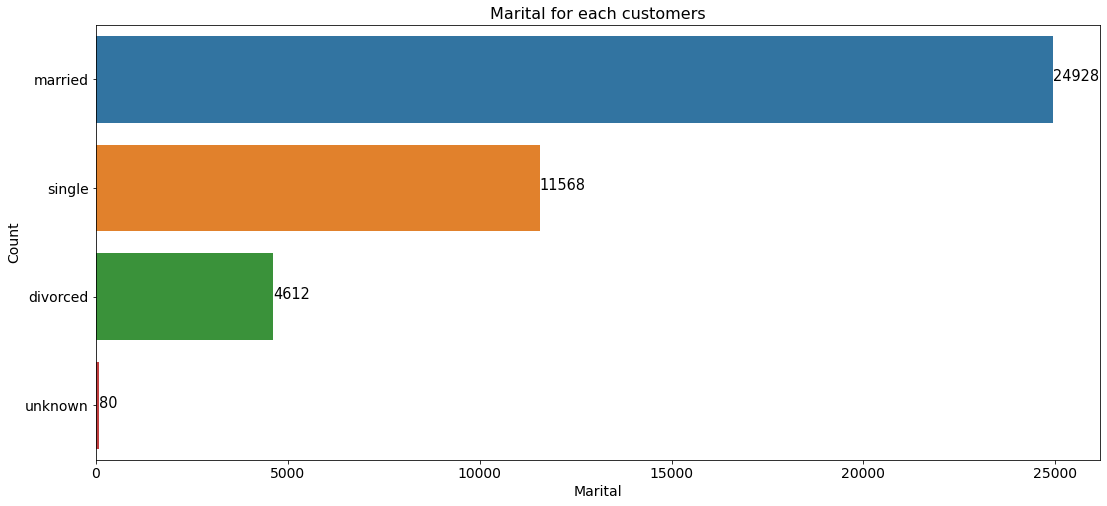

In [ ]:
# Marital
plt.figure(figsize = (18, 8))
job_sns = sns.countplot(y = bank_dataset.marital)
job_sns.set_xticklabels(job_sns.get_xticklabels())

for counts in job_sns.patches:
  width = counts.get_width()
  label_x = counts.get_x() + counts.get_width() + 0.05
  label_y = counts.get_y() + counts.get_height() / 1.8
  plt.text(label_x, label_y, s = f"{width:.0f}", ha='left', va='bottom', color = "black", size = 14.5)

plt.xlabel("Marital", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Marital for each customers", fontsize = 16)

In [ ]:
flt = plt.figure(figsize = (12, 8))



<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Count')

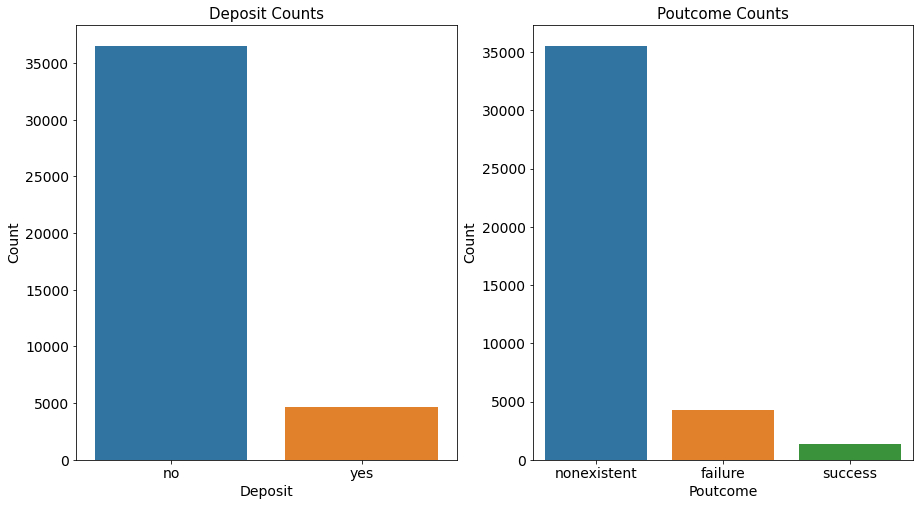

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))

# Deposit
ax1 = sns.countplot(x = bank_dataset.y, ax = axes[0])
ax1.set_title("Deposit Counts", fontsize = 15)
ax1.set_xlabel("Deposit")
ax1.set_ylabel("Count")

# Poutcome
ax1 = sns.countplot(x = bank_dataset.poutcome, ax = axes[1])
ax1.set_title("Poutcome Counts", fontsize = 15)
ax1.set_xlabel("Poutcome")
ax1.set_ylabel("Count")

Text(0, 0.5, 'Count')

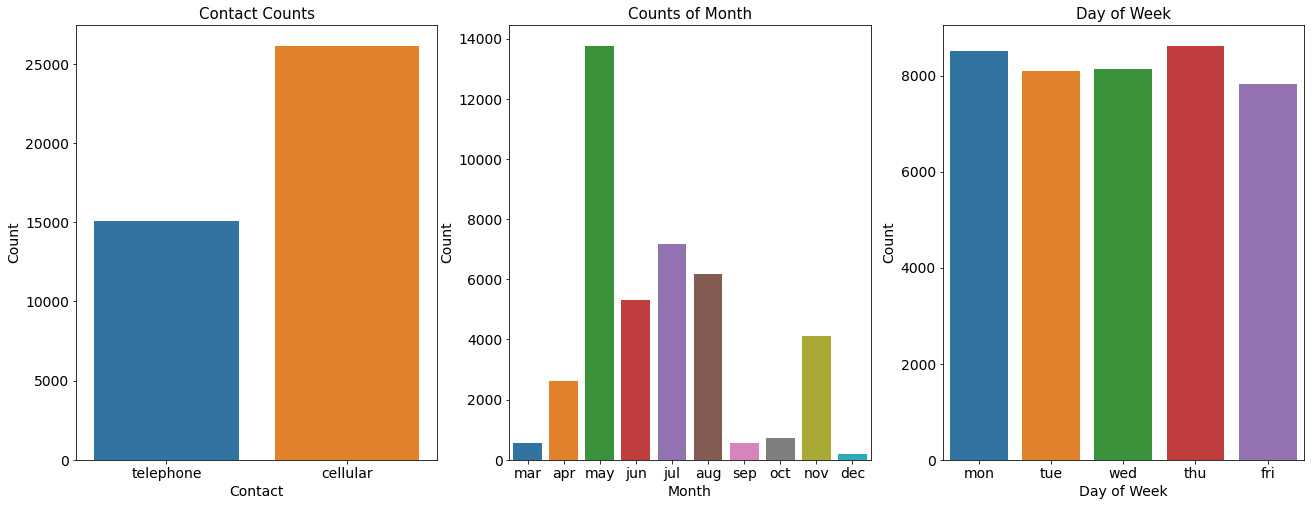

In [ ]:
"Contacts, Day of Week and Month"
fig, axes = plt.subplots(1, 3, figsize = (22, 8))

# Contact
ax1 = sns.countplot(x = bank_dataset.contact, ax = axes[0])
ax1.set_title("Contact Counts", fontsize = 15)
ax1.set_xlabel("Contact")
ax1.set_ylabel("Count")

# Month
ax2 = sns.countplot(x = bank_dataset.month, ax = axes[1], order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_title("Counts of Month", fontsize = 15)
ax2.set_xlabel("Month")
ax2.set_ylabel("Count")

# Day of Week
ax3 = sns.countplot(x = bank_dataset.day_of_week, ax = axes[2], order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title("Day of Week", fontsize = 15)
ax3.set_xlabel("Day of Week")
ax3.set_ylabel("Count")

Text(0, 0.5, 'Count')

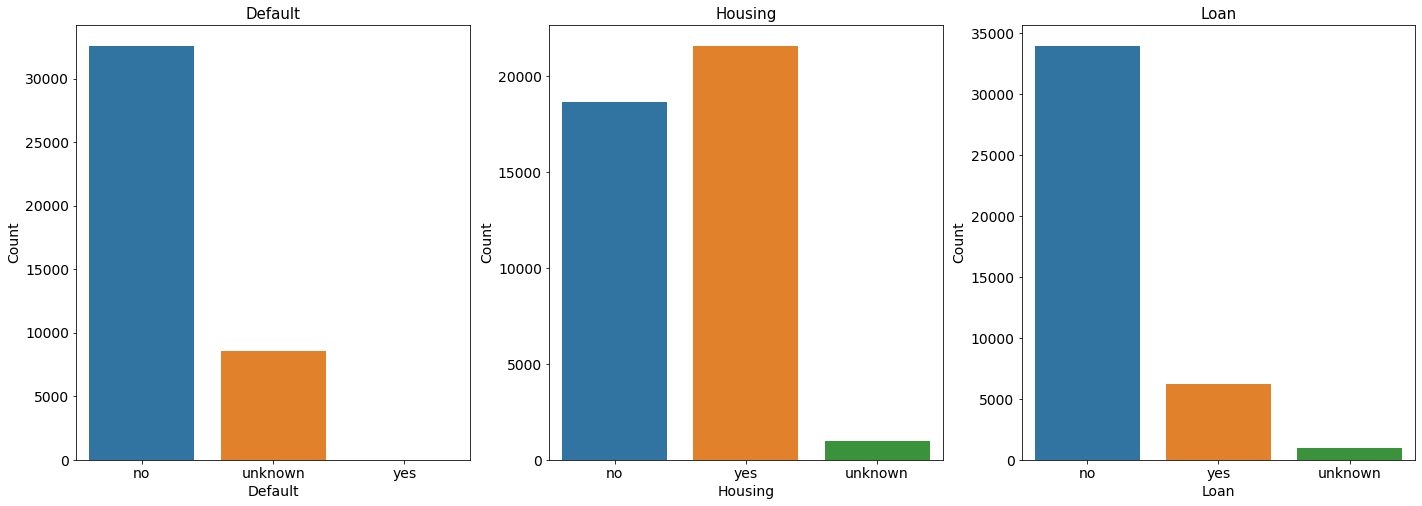

In [ ]:
"Default, Housing, Loan"
fig, axes = plt.subplots(1, 3, figsize = (24, 8))

# Default
ax1 = sns.countplot(x = bank_dataset.default, ax = axes[0])
ax1.set_title("Default", fontsize = 15)
ax1.set_xlabel("Default")
ax1.set_ylabel("Count")

# Housing
ax2 = sns.countplot(x = bank_dataset.housing, ax = axes[1])
ax2.set_title("Housing", fontsize = 15)
ax2.set_xlabel("Housing")
ax2.set_ylabel("Count")

# Loan
ax3 = sns.countplot(x = bank_dataset.loan, ax = axes[2])
ax3.set_title("Loan", fontsize = 15)
ax3.set_xlabel("Loan")
ax3.set_ylabel("Count")

# Pre-processing

In [ ]:
bank_dataset_process = bank_dataset.replace("unknown", np.nan)
bank_dataset_process

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank_dataset_process.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


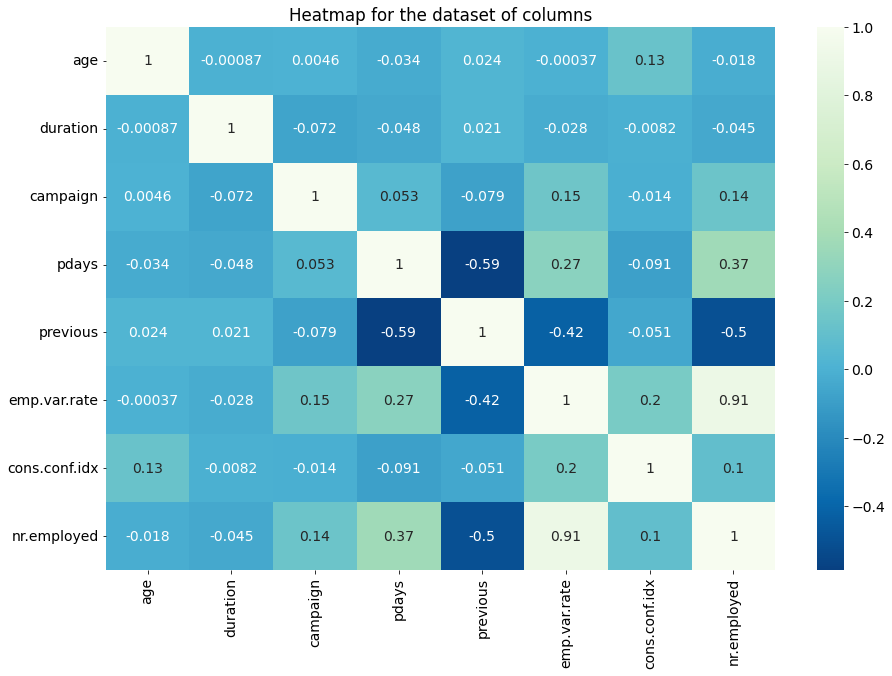

In [ ]:
# Features correlation
plt.figure(figsize = (15, 10))
sns.heatmap(bank_dataset_process[["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", 
                                  "cons.conf.idx", "nr.employed"]].corr(), 
            cmap = "GnBu_r", annot = True)
plt.title("Heatmap for the dataset of columns")
plt.show()

In [ ]:
bank_dataset_process.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
bank_dataset_process.dropna(inplace = True)
bank_dataset_process

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Normalization the dataset with LabelEncoder**

In [ ]:
# Encode string into incremental value
le = LabelEncoder()
for column_name in bank_dataset_process.columns:
   if bank_dataset_process[column_name].dtype == object:
     bank_dataset_process[column_name] = le.fit_transform(bank_dataset_process[column_name])

bank_dataset_process[[column_name]]

,y
0,0
2,0
3,0
4,0
6,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
x = bank_dataset_process.drop(["y"], axis = 1)
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y = bank_dataset_process[["y"]]
y

,y
0,0
2,0
3,0
4,0
6,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21341, 20), (21341, 1), (9147, 20), (9147, 1))

In [ ]:
# Applying SMOTE on the training data
sm = SMOTE(random_state = 42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)

In [ ]:
x_train_smote.shape, y_train_smote.shape, x_test_smote.shape, y_test_smote.shape

((37310, 20), (37310, 1), (15948, 20), (15948, 1))

In [ ]:
# Applying Random Over Sampler on the training data
over_sampling = RandomOverSampler()
x_train_sampled, y_train_sampled = over_sampling.fit_resample(x_train, y_train)
x_test_sampled, y_test_sampled = over_sampling.fit_resample(x_test, y_test)

In [ ]:
x_train_sampled.shape, y_train_sampled.shape, x_test_sampled.shape, y_test_sampled.shape

((37310, 20), (37310, 1), (15948, 20), (15948, 1))

In [ ]:
feature_train, feature_val, label_train, label_val = train_test_split(x_train, y_train, test_size = 0.1)

# Training and predicting the dataset for each algorithm

**Machine Learning Algorithms**

In [ ]:
# Define a function which evaluates the model with train and test score 
def model_eval(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report

  model.fit(x_train, y_train.values.ravel())

  # Print accuracy, AUC and Recall Score in the train data
  y_prediction_train = model.predict(x_train)
  y_score_train = model.predict_proba(x_train)[:,1]
  print("Overall Train Accuracy:", accuracy_score(y_train, y_prediction_train))
  print("Train AUC Score:", roc_auc_score(y_train, y_score_train))
  print("Overall Train Recall:", recall_score(y_train, y_prediction_train))

  print("-" * 60)
  
  y_prediction = model.predict(x_test)
  y_score = model.predict_proba(x_test)[:,1]

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_score))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

  # Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (15.5, 7))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 14.35},
                        xticklabels = ['no', 'yes'], 
                        yticklabels = ['no', 'yes'], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 14.5)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5, 
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score), color = colors)
  plt.title("ROC Curve", fontsize = 14.5)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
x_train_dataset = [x_train, x_train_smote, x_train_sampled]
y_train_dataset = [y_train, y_train_smote, y_train_sampled]
x_test_dataset = [x_test, x_test_smote, x_test_sampled]
y_test_dataset = [y_test, y_test_smote, y_test_sampled]
name = ['Normal Sampling' , 'SMOTE', 'Over Sampling']

Naive Bayes Algorithms

Data is Normal Sampling
------------------------------------------------------------
Overall Train Accuracy: 0.8252190618996298
Train AUC Score: 0.8483086306933536
Overall Train Recall: 0.6083395383469844
------------------------------------------------------------
Overall Test Accuracy: 0.8263911665026785
Test AUC Score: 0.8500877532286839
Overall Test Recall: 0.6146632566069906
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      7974
           1       0.39      0.61      0.48      1173

    accuracy                           0.83      9147
   macro avg       0.66      0.74      0.69      9147
weighted avg       0.87      0.83      0.84      9147



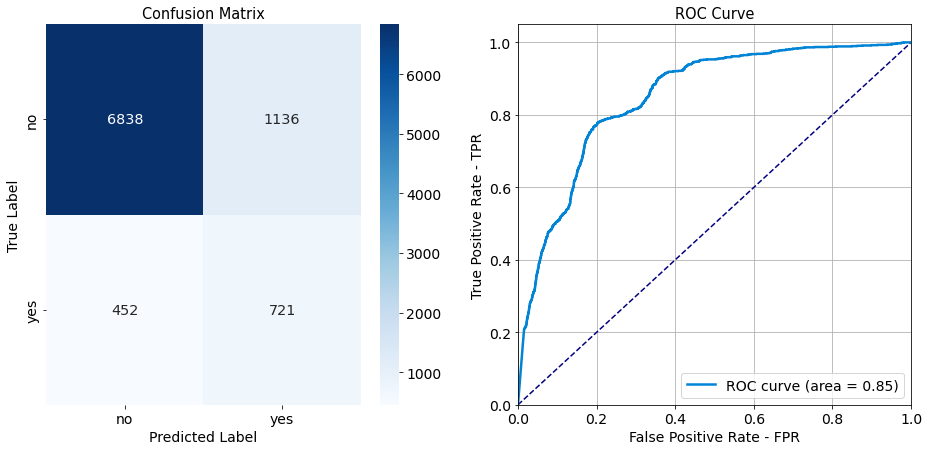

____________________________________________________________
Data is SMOTE
------------------------------------------------------------
Overall Train Accuracy: 0.7813990887161619
Train AUC Score: 0.8668883888858917
Overall Train Recall: 0.8023586169927633
------------------------------------------------------------
Overall Test Accuracy: 0.7906320541760722
Test AUC Score: 0.8730940140357089
Overall Test Recall: 0.8102583396037121
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      7974
           1       0.78      0.81      0.79      7974

    accuracy                           0.79     15948
   macro avg       0.79      0.79      0.79     15948
weighted avg       0.79      0.79      0.79     15948



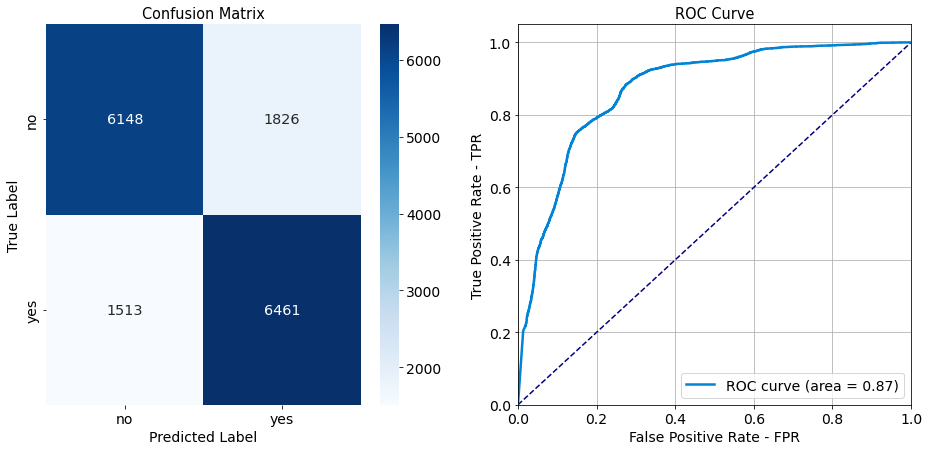

____________________________________________________________
Data is Over Sampling
------------------------------------------------------------
Overall Train Accuracy: 0.784534977217904
Train AUC Score: 0.8498023348676086
Overall Train Recall: 0.7730367193781827
------------------------------------------------------------
Overall Test Accuracy: 0.7859919739152245
Test AUC Score: 0.8503278761694091
Overall Test Recall: 0.7723852520692249
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      7974
           1       0.79      0.77      0.78      7974

    accuracy                           0.79     15948
   macro avg       0.79      0.79      0.79     15948
weighted avg       0.79      0.79      0.79     15948



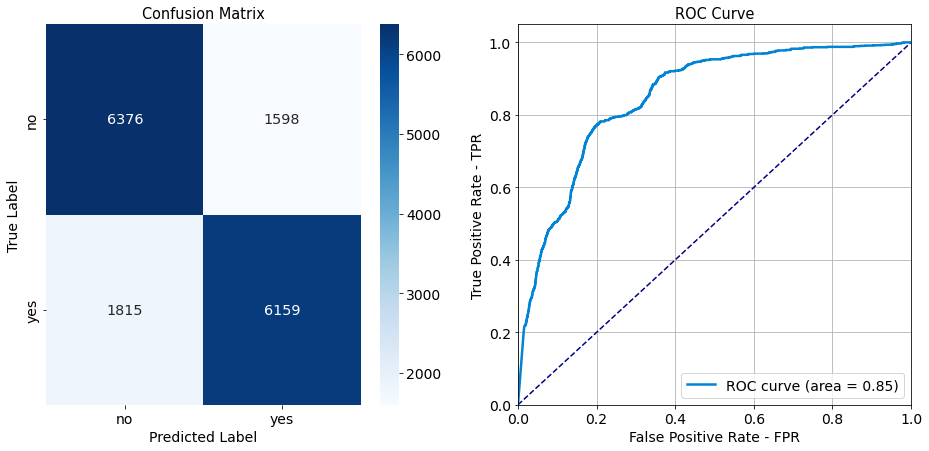

____________________________________________________________


In [ ]:
# Result of each Sampling Method
colors_NB = "#0184D6"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  print("-" * 60)
  model_eval(GaussianNB(), Xtrain, Ytrain, Xtest, Ytest, colors_NB)
  print("_" * 60)

Random Forest Algorithms

Data is Normal Sampling
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.904340220837433
Test AUC Score: 0.9404210316093374
Overall Test Recall: 0.5294117647058824
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7974
           1       0.66      0.53      0.59      1173

    accuracy                           0.90      9147
   macro avg       0.80      0.74      0.77      9147
weighted avg       0.90      0.90      0.90      9147



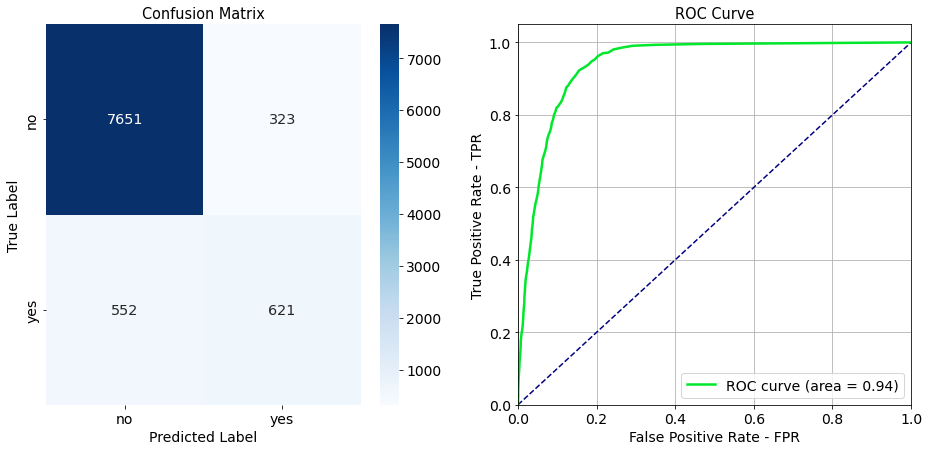

____________________________________________________________
Data is SMOTE
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.9182969651366942
Test AUC Score: 0.9790527280503875
Overall Test Recall: 0.9013042387760221
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7974
           1       0.93      0.90      0.92      7974

    accuracy                           0.92     15948
   macro avg       0.92      0.92      0.92     15948
weighted avg       0.92      0.92      0.92     15948



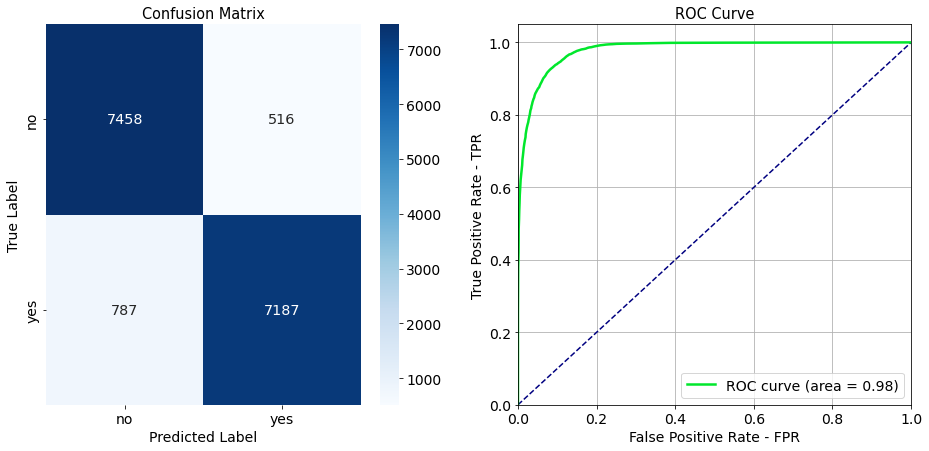

____________________________________________________________
Data is Over Sampling
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.7891898670679709
Test AUC Score: 0.940304940769062
Overall Test Recall: 0.6389515926761976
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.72      0.94      0.82      7974
           1       0.91      0.64      0.75      7974

    accuracy                           0.79     15948
   macro avg       0.82      0.79      0.78     15948
weighted avg       0.82      0.79      0.78     15948



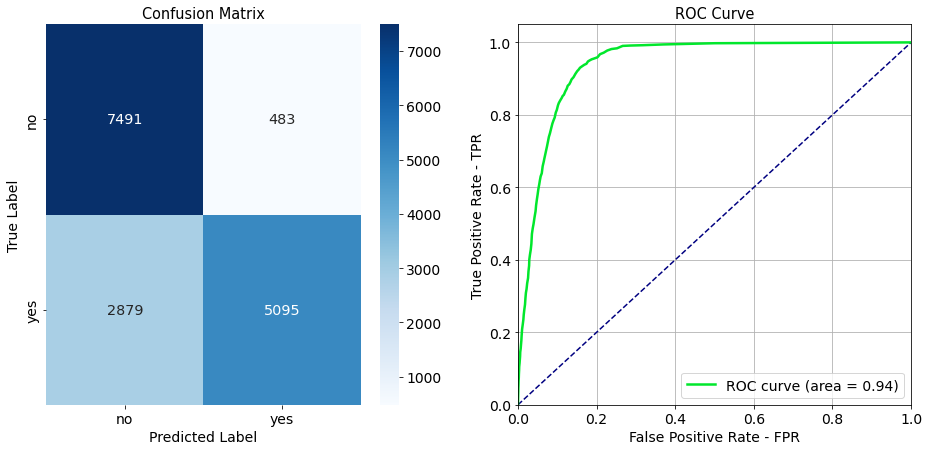

____________________________________________________________


In [ ]:
# Result of each Sampling Method
colors_RF = "#01E72C"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(RandomForestClassifier(), Xtrain, Ytrain, Xtest, Ytest, colors_RF)
  print("_" * 60)

Support Vector Machine Algorithms

Data is Normal Sampling
Overall Train Accuracy: 0.8890398762944567
Train AUC Score: 0.9196404797461768
Overall Train Recall: 0.2676842889054356
------------------------------------------------------------
Overall Test Accuracy: 0.8857548923144201
Test AUC Score: 0.9204185769137592
Overall Test Recall: 0.2566069906223359
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7974
           1       0.64      0.26      0.37      1173

    accuracy                           0.89      9147
   macro avg       0.77      0.62      0.65      9147
weighted avg       0.87      0.89      0.86      9147



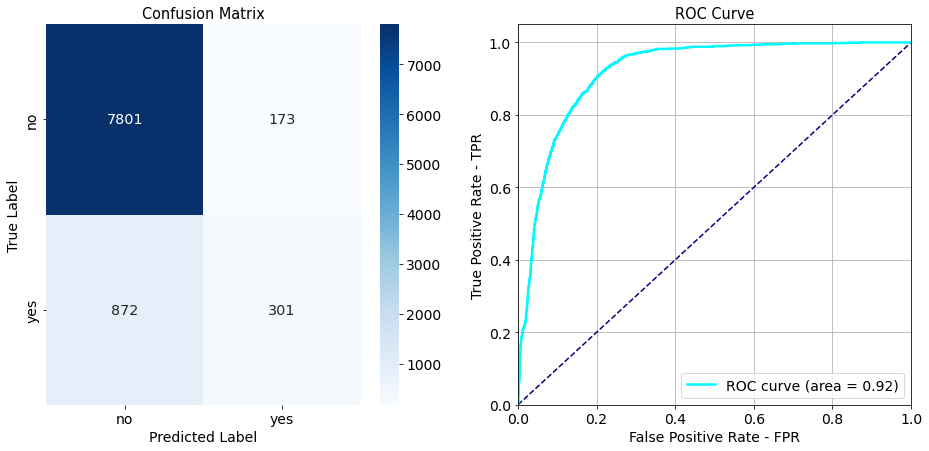

____________________________________________________________
Data is SMOTE


In [ ]:
# Result of each Sampling Method
colors_SVC = "#02F9FF"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(SVC(kernel='linear', C = 0.001, probability = True), Xtrain, Ytrain, Xtest, Ytest, colors_SVC)
  print("_" * 60)

**Deep Learning Model: Long-Short Term Memory (LSTM)**

In [ ]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras import layers, models

**Create table with DataFrame - Including F1-Score, Accuracy, Percision, Recall**

In [ ]:
"Naive Bayes Algorithms"
# Implement and Building for Naive Bayes Algorithms Models
naive_bayes = GaussianNB()
NB_normal_sampled = naive_bayes.fit(x_train, y_train.values.ravel())
NB_SMOTE = naive_bayes.fit(x_train_smote, y_train_smote.values.ravel())
NB_over_sampled = naive_bayes.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_NB_normal_sampled = naive_bayes.predict(x_test)
y_predict_NB_SMOTE = naive_bayes.predict(x_test_smote)
y_predict_NB_over_sampled = naive_bayes.predict(x_test_sampled)

"Random Forest Classifiers Algorithms"
# Implement and Building for Random Forest Classifiers Algorithms Models
random_forest = RandomForestClassifier()
RF_normal_sampled = random_forest.fit(x_train, y_train.values.ravel())
RF_SMOTE = random_forest.fit(x_train_smote, y_train_smote.values.ravel())
RF_over_sampled = random_forest.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_RF_normal_sampled = random_forest.predict(x_test)
y_predict_RF_SMOTE = random_forest.predict(x_test_smote)
y_predict_RF_over_sampled = random_forest.predict(x_test_sampled)

"Support Vector Machine Algorithms"
# Implement and Building for Support Vector Machine Algorithms Models
support_vector_machine = SVC(kernel='linear', C = 0.001, probability = True)
SVC_normal_sampled = support_vector_machine.fit(x_train, y_train.values.ravel())
SVC_SMOTE = support_vector_machine.fit(x_train_smote, y_train_smote.values.ravel())
SVC_over_sampled = support_vector_machine.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_SVC_normal_sampled = support_vector_machine.predict(x_test)
y_predict_SVC_SMOTE = support_vector_machine.predict(x_test_smote)
y_predict_SVC_over_sampled = support_vector_machine.predict(x_test_sampled)

Normal Sampled Dataset

In [ ]:
"Print precision, recall, accuracy, f1-score for each algorithms"
# Naive Bayes
precision_NB = metrics.precision_score(y_test, y_predict_NB_normal_sampled)
accuracy_NB = metrics.accuracy_score(y_test, y_predict_NB_normal_sampled)
f1_score_NB = metrics.f1_score(y_test, y_predict_NB_normal_sampled)
recall_NB = metrics.recall_score(y_test, y_predict_NB_normal_sampled)

# Random Forest
precision_RF = metrics.precision_score(y_test, y_predict_RF_normal_sampled)
accuracy_RF = metrics.accuracy_score(y_test, y_predict_RF_normal_sampled)
f1_score_RF = metrics.f1_score(y_test, y_predict_RF_normal_sampled)
recall_RF = metrics.recall_score(y_test, y_predict_RF_normal_sampled)

# Support Vector Machine
precision_SVC = metrics.precision_score(y_test, y_predict_SVC_normal_sampled)
accuracy_SVC = metrics.accuracy_score(y_test, y_predict_SVC_normal_sampled)
f1_score_SVC = metrics.f1_score(y_test, y_predict_SVC_normal_sampled)
recall_SVC = metrics.recall_score(y_test, y_predict_SVC_normal_sampled)

In [ ]:
information_normal_sampled = {"Name Algorithms" : ["Naive Bayes", "Random Forest", "Support Vector Machine"],
               "Precision": [precision_NB, precision_RF, precision_SVC],
               "Recall": [recall_NB, recall_RF, recall_SVC], 
               "F1-Score": [f1_score_NB, f1_score_RF, f1_score_SVC],
               "Accuracy": [accuracy_NB, accuracy_RF, accuracy_SVC]}

df_1 = pd.DataFrame(information_normal_sampled)
df_1

,Name Algorithms,Precision,Recall,F1-Score,Accuracy
0,Naive Bayes,0.366965,0.768968,0.496833,0.800262
1,Random Forest,0.613950,0.645354,0.629260,0.902482
2,Support Vector Machine,0.444042,0.835465,0.579882,0.844758


In [ ]:
color = ['#0299FF','#02FF61','#4DFF02','#02F2FF']

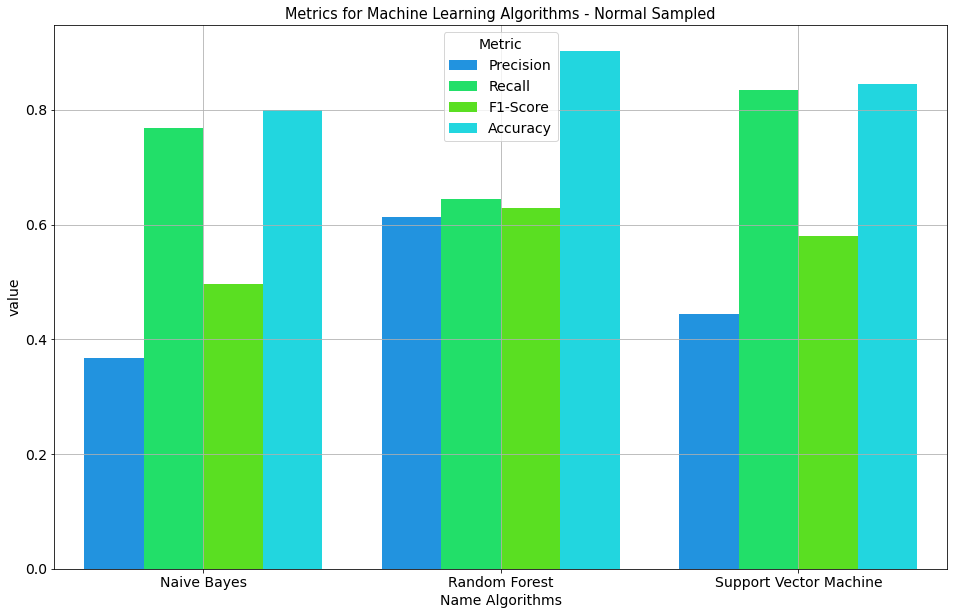

In [ ]:
# Barplot DataFrame by Group with seaborn barplot
plt.figure(figsize = (16, 10))
group_1 = df_1.melt(id_vars = ["Name Algorithms"], var_name = ["Metric"])
sns.barplot(data = group_1, x = 'Name Algorithms', y = 'value', hue = 'Metric', palette = color)
plt.title("Metrics for Machine Learning Algorithms - Normal Sampled", fontsize = 14.5)
plt.grid()

SMOTE Dataset

In [ ]:
"Print precision, recall, accuracy, f1-score for each algorithms"
# Naive Bayes
precision_NB_SMOTE = metrics.precision_score(y_test_smote, y_predict_NB_SMOTE)
accuracy_NB_SMOTE = metrics.accuracy_score(y_test_smote, y_predict_NB_SMOTE)
f1_score_NB_SMOTE = metrics.f1_score(y_test_smote, y_predict_NB_SMOTE)
recall_NB_SMOTE = metrics.recall_score(y_test_smote, y_predict_NB_SMOTE)

# Random Forest
precision_RF_SMOTE = metrics.precision_score(y_test_smote, y_predict_RF_SMOTE)
accuracy_RF_SMOTE = metrics.accuracy_score(y_test_smote, y_predict_RF_SMOTE)
f1_score_RF_SMOTE = metrics.f1_score(y_test_smote, y_predict_RF_SMOTE)
recall_RF_SMOTE = metrics.recall_score(y_test_smote, y_predict_RF_SMOTE)

# Support Vector Machine
precision_SVC_SMOTE = metrics.precision_score(y_test_smote, y_predict_SVC_SMOTE)
accuracy_SVC_SMOTE = metrics.accuracy_score(y_test_smote, y_predict_SVC_SMOTE)
f1_score_SVC_SMOTE = metrics.f1_score(y_test_smote, y_predict_SVC_SMOTE)
recall_SVC_SMOTE = metrics.recall_score(y_test_smote, y_predict_SVC_SMOTE)

In [ ]:
information_SMOTE = {"Name Algorithms (SMOTE)" : ["Naive Bayes", "Random Forest", "Support Vector Machine"],
               "Precision": [precision_NB_SMOTE, precision_RF_SMOTE, precision_SVC_SMOTE],
               "Recall": [recall_NB_SMOTE, recall_RF_SMOTE, recall_SVC_SMOTE], 
               "F1-Score": [f1_score_NB_SMOTE, f1_score_RF_SMOTE, f1_score_SVC_SMOTE],
               "Accuracy": [accuracy_NB_SMOTE, accuracy_RF_SMOTE, accuracy_SVC_SMOTE]}

df_2 = pd.DataFrame(information_SMOTE)
df_2

,Name Algorithms (SMOTE),Precision,Recall,F1-Score,Accuracy
0,Naive Bayes,0.797501,0.768498,0.782731,0.786682
1,Random Forest,0.919240,0.679458,0.781367,0.809882
2,Support Vector Machine,0.844487,0.835591,0.840015,0.840858


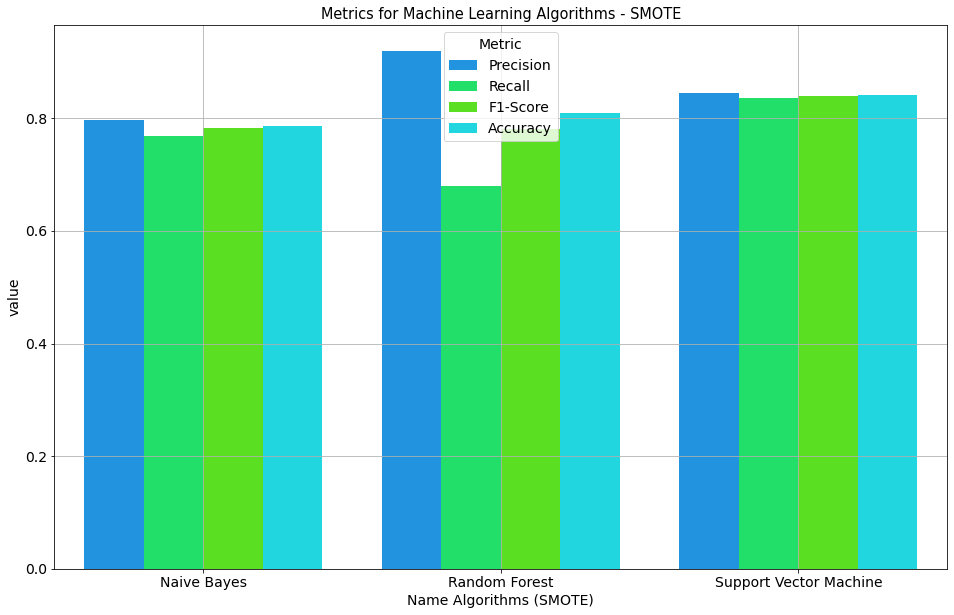

In [ ]:
# Barplot DataFrame by Group with seaborn barplot
plt.figure(figsize = (16, 10))
group_2 = df_2.melt(id_vars = ["Name Algorithms (SMOTE)"], var_name = ["Metric"])
sns.barplot(data = group_2, x = 'Name Algorithms (SMOTE)', y = 'value', hue = 'Metric', palette = color)
plt.title("Metrics for Machine Learning Algorithms - SMOTE", fontsize = 14.5)
plt.grid()

Over Sampled Dataset

In [ ]:
# Naive Bayes
precision_NB_sampled = metrics.precision_score(y_test_sampled, y_predict_NB_over_sampled)
accuracy_NB_sampled = metrics.accuracy_score(y_test_sampled, y_predict_NB_over_sampled)
f1_score_NB_sampled = metrics.f1_score(y_test_sampled, y_predict_NB_over_sampled)
recall_NB_sampled = metrics.recall_score(y_test_sampled, y_predict_NB_over_sampled)

# Random Forest
precision_RF_sampled = metrics.precision_score(y_test_sampled, y_predict_RF_over_sampled)
accuracy_RF_sampled = metrics.accuracy_score(y_test_sampled, y_predict_RF_over_sampled)
f1_score_RF_sampled = metrics.f1_score(y_test_sampled, y_predict_RF_over_sampled)
recall_RF_sampled = metrics.recall_score(y_test_sampled, y_predict_RF_over_sampled)

# Support Vector Machine
precision_SVC_sampled = metrics.precision_score(y_test_sampled, y_predict_SVC_over_sampled)
accuracy_SVC_sampled = metrics.accuracy_score(y_test_sampled, y_predict_SVC_over_sampled)
f1_score_SVC_sampled = metrics.f1_score(y_test_sampled, y_predict_SVC_over_sampled)
recall_SVC_sampled = metrics.recall_score(y_test_sampled, y_predict_SVC_over_sampled)

In [ ]:
information_over_sampled = {"Name Algorithms (Over Sampled)" : ["Naive Bayes ", "Random Forest", "Support Vector Machine"],
               "Precision": [precision_NB_sampled, precision_RF_sampled, precision_SVC_sampled],
               "Recall": [recall_NB_sampled, recall_RF_sampled, recall_SVC_sampled], 
               "F1-Score": [f1_score_NB_sampled, f1_score_RF_sampled, f1_score_SVC_sampled],
               "Accuracy": [accuracy_NB_sampled, accuracy_RF_sampled, accuracy_SVC_sampled]}

df_3 = pd.DataFrame(information_over_sampled)
df_3

,Name Algorithms (Over Sampled),Precision,Recall,F1-Score,Accuracy
0,Naive Bayes,0.799070,0.776022,0.787378,0.790444
1,Random Forest,0.915483,0.646601,0.757901,0.793454
2,Support Vector Machine,0.844743,0.837221,0.840965,0.841673


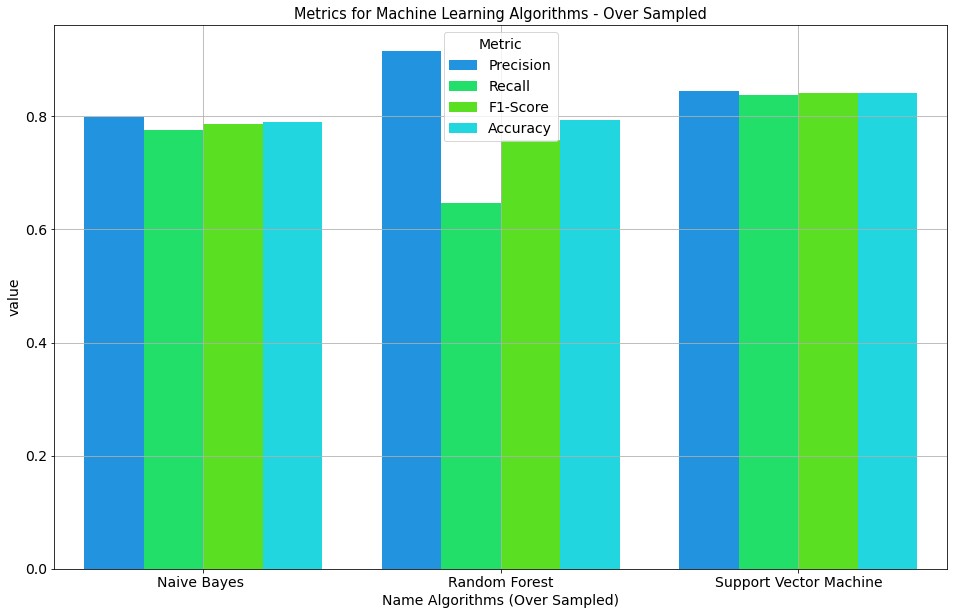

In [ ]:
# Barplot DataFrame by Group with seaborn barplot
plt.figure(figsize = (16, 10))
group_3 = df_3.melt(id_vars = ["Name Algorithms (Over Sampled)"], var_name = ["Metric"])
sns.barplot(data = group_3, x = 'Name Algorithms (Over Sampled)', y = 'value', hue = 'Metric', palette = color)
plt.title("Metrics for Machine Learning Algorithms - Over Sampled", fontsize = 14.5)
plt.grid()

In [ ]:
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(20, 1)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 33,602
Trainable params: 33,602
Non-trainable params: 0
_________________________________________________________________


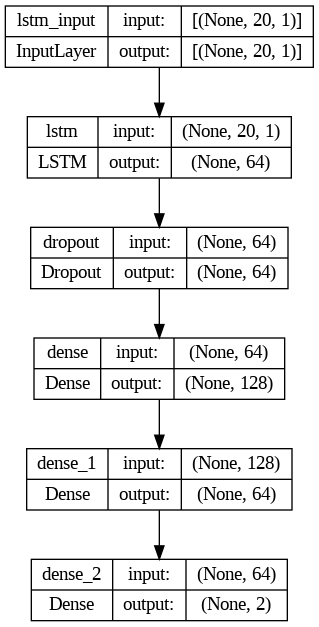

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
check_point = ModelCheckpoint('model.hdf5', monitor="accuracy", mode="max",
                              verbose=True, save_best_only=True)

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 1000, batch_size = 256, verbose=True,
                    validation_data=(x_test, y_test), callbacks = [check_point])

Epoch 1/1000
84/84 [==============================] - ETA: 0s - loss: 0.4136 - accuracy: 0.8621
Epoch 1: accuracy improved from -inf to 0.86214, saving model to model.hdf5
84/84 [==============================] - 8s 62ms/step - loss: 0.4136 - accuracy: 0.8621 - val_loss: 0.3644 - val_accuracy: 0.8718
Epoch 2/1000
83/84 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8742
Epoch 2: accuracy improved from 0.86214 to 0.87414, saving model to model.hdf5
84/84 [==============================] - 7s 86ms/step - loss: 0.3812 - accuracy: 0.8741 - val_loss: 0.3784 - val_accuracy: 0.8718
Epoch 3/1000
83/84 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8742
Epoch 3: accuracy did not improve from 0.87414
84/84 [==============================] - 5s 54ms/step - loss: 0.3805 - accuracy: 0.8741 - val_loss: 0.3791 - val_accuracy: 0.8718
Epoch 4/1000
84/84 [==============================] - ETA: 0s - loss: 0.3799 - accuracy: 0.8741
Epoch 4: accuracy did no

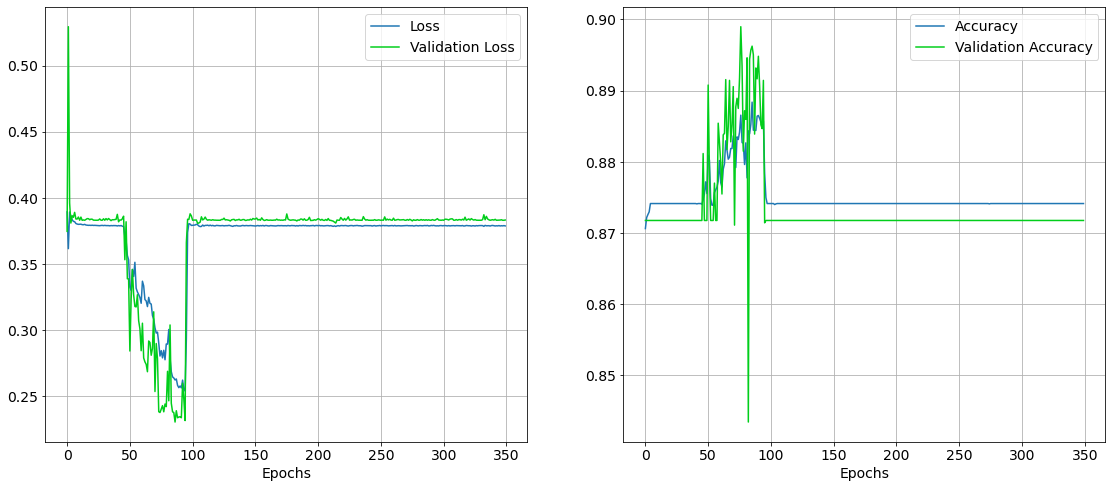

In [ ]:
# Loss and Accuracy of LSTM Model
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig = plt.gcf()
fig.set_size_inches(19, 8)
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(validation_loss, color = "#01CE1B")
plt.xlabel("Epochs")
plt.legend(['Loss', 'Validation Loss'])
plt.grid()
plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy, color = "#01CE1B")
plt.xlabel("Epochs")
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()
plt.savefig('LSTM_Bank_Marketing - Normal Sampling.png')
plt.show()

In [ ]:
from keras.models import load_model
saved_model = load_model("model.hdf5")
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def model_eval_LSTM(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report

  model.fit(x_train, y_train)
  y_prediction = model.predict(x_test)
  y_prediction = np.argmax(y_prediction, axis = -1)

  _, train_acc = model.evaluate(x_train, y_train, verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_prediction))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

  # Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (15.5, 7))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 14.35},
                        xticklabels = ['no', 'yes'], 
                        yticklabels = ['no', 'yes'], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 14.5)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prediction)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5, 
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_prediction), color = colors)
  plt.title("ROC Curve", fontsize = 14.5)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

Data is Normal Sampling
286/286 [==============================] - 1s 4ms/step
Train: 0.911, Test: 0.902
Overall Test Accuracy: 0.9024816879851317
Test AUC Score: 0.763745600310985
Overall Test Recall: 0.577152600170503
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7974
           1       0.63      0.58      0.60      1173

    accuracy                           0.90      9147
   macro avg       0.78      0.76      0.77      9147
weighted avg       0.90      0.90      0.90      9147



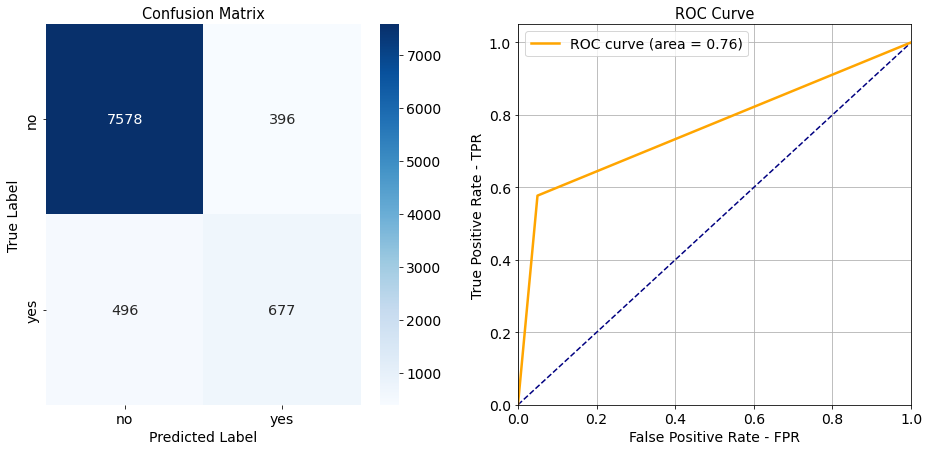

____________________________________________________________
Data is SMOTE
499/499 [==============================] - 2s 4ms/step
Train: 0.899, Test: 0.890
Overall Test Accuracy: 0.8902056684223727
Test AUC Score: 0.8902056684223727
Overall Test Recall: 0.9319036869826938
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      7974
           1       0.86      0.93      0.89      7974

    accuracy                           0.89     15948
   macro avg       0.89      0.89      0.89     15948
weighted avg       0.89      0.89      0.89     15948



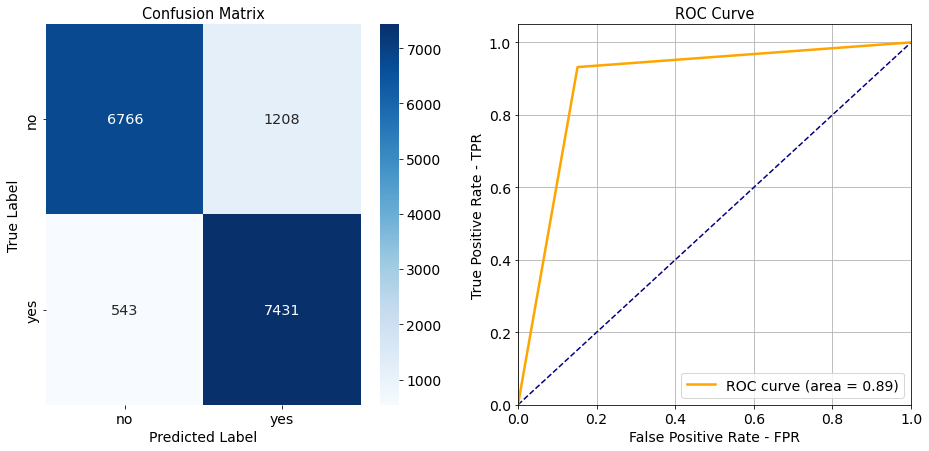

____________________________________________________________
Data is Over Sampling
499/499 [==============================] - 2s 5ms/step
Train: 0.855, Test: 0.850
Overall Test Accuracy: 0.8502633559066968
Test AUC Score: 0.8502633559066969
Overall Test Recall: 0.8905191873589164
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7974
           1       0.82      0.89      0.86      7974

    accuracy                           0.85     15948
   macro avg       0.85      0.85      0.85     15948
weighted avg       0.85      0.85      0.85     15948



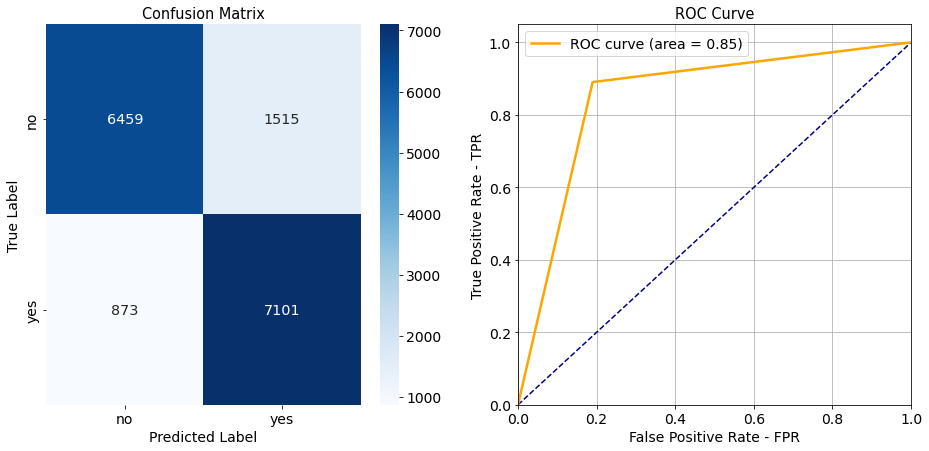

____________________________________________________________


In [ ]:
colors = "orange"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval_LSTM(saved_model, Xtrain, Ytrain, Xtest, Ytest, colors)
  print("_" * 60)